`Automobiles of the 20th century`

*Introduction*

The Automobile Dataset is a comprehensive collection of data related to various aspects of automobile specifications, performance metrics, and attributes.

*Links and Sources*

Aggregated data:
This dataset consist of data From 1985 Ward's Automotive Yearbook.

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037​

Other links: https://www.kaggle.com/datasets/toramky/automobile-dataset


*How was the data collected*

The Automobile Dataset was collected from reputable sources and structured with a focus on vehicle specifications and performance metrics.

*Sample*

203 automobiles

*Data Processing*

Not processed

*Sampling*

The Automobile Dataset uses convenience sampling based on publicly available information from automotive publications, such as the 1985 Ward’s Automotive Yearbook. Vehicles included in the dataset represent a cross-section of popular cars from that time, produced by various manufacturers worldwide.

While the data covers a range of brands, engine types, and fuel systems, it is not a randomized or exhaustive sample of all cars from 1985. Instead, it focuses on vehicles for which comprehensive specifications were readily accessible. This makes the dataset suitable for exploratory analysis but not fully representative of the global automobile market at the time.

*Units*

The units are automobiles. The  size of the sample is 205. Each observation is rich in characteristics, there are 26 variables but we study only 4 of them (2 continuos and 2 categorical)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


*Variables*

In [4]:
df = pd.DataFrame(data=df, columns=['make', 'fuel-type', 'horsepower', 'city-mpg'])
df = df[df['horsepower'] != '?']
df

,make,fuel-type,horsepower,city-mpg
0,alfa-romero,gas,111,21
1,alfa-romero,gas,111,21
2,alfa-romero,gas,154,19
3,audi,gas,102,24
4,audi,gas,115,18
...,...,...,...,...
200,volvo,gas,114,23
201,volvo,gas,160,19
202,volvo,gas,134,18
203,volvo,diesel,106,26


Variable *make*


Description: The variable describes the make of each car

Type: categorical

Levels: 'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'

In [5]:
make = df['make']
make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Variable *fuel-type*


Description: The variable describes fuel type of each car


Type: categorical


Levels: 'gas', 'diesel'

In [6]:
fuel_type = df['fuel-type']
fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

Variable *horsepower*


Description: The variable describes horsepower of each car


Type: continuos


Range: [48, 288]

In [7]:
horsepower = df['horsepower'].astype(int)
min(horsepower), max(horsepower)

(48, 288)

Variable *city-mpg*


Description: The variable describes fuel efficiency in city driving conditions of each car in mpg


Type: continuos


Range: [13, 49]

In [8]:
city_mpg = df['city-mpg'].astype(int)
min(city_mpg), max(city_mpg)

(13, 49)

`The work`

1.1 Plotting pairs of numerical variables, covariance and correlation

Plotting the scatter of mpg in the city and horsepower

Purpose: see visually if there is correlation between the variables

Condition: use plt (matplotlib.pyplot) to create scatter, label axes

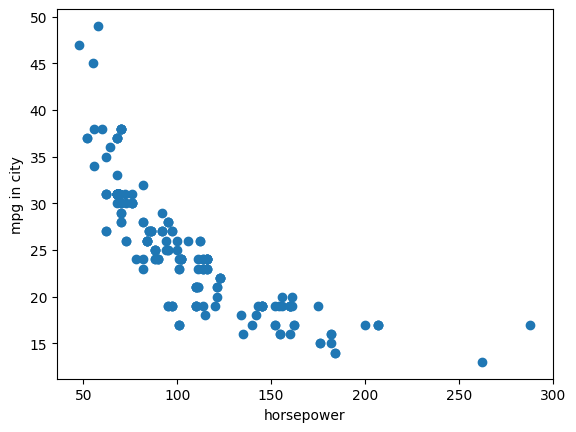

In [9]:
plt.scatter(horsepower,city_mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg in city')
plt.show()

Conclusion: visually, there exists a correlation between the variables

Calculating covariance and correlation coef. between the shown above variables

Purpose: see if there is real correlation between the variables

Condition: use numpy commands `cov` and `corrcoef`

In [10]:
np.cov(horsepower, city_mpg)

array([[1577.23108813, -209.7057016 ],
       [-209.7057016 ,   43.17412086]])

In [11]:
np.corrcoef(horsepower, city_mpg)

array([[ 1.        , -0.80362016],
       [-0.80362016,  1.        ]])

Conclusion: covariance is <0, which means variables move in different directions. The correlation coef. indicates a strong negative linear relationship between two variables

1.2 Representing and analyzing a numerical variable according to its category, variance decomposition and empirical correlation ratio

Plotting a density histogram of horsepower

Purpose: see the distribution of the variable

Condition: use numpy command `array` for bins and matplotlib.pyplot commands to plot histogram

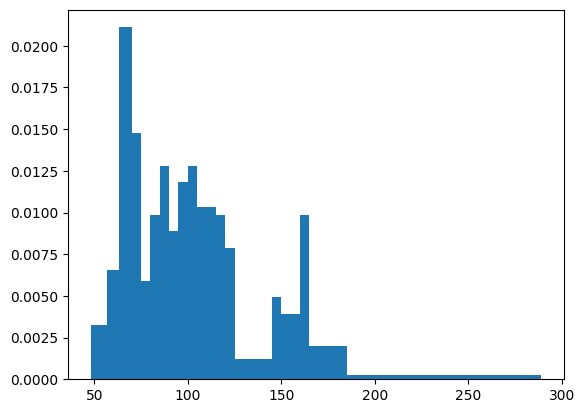

In [12]:
bins = np.array([48., 57., 63., 70., 75., 80., 85., 90., 95., 100., 105., 115., 120., 125., 145., 150., 160., 165., 185., 289.])
plt.hist(horsepower, bins = bins, density = True)
plt.show()

Conclusion: it's not evident what the correlation is

Plotting two density histograms of horsepower given different fuel types

Purpose: see how horsepower is distributed with different types of fuel

Condition: use seaborn command `histplot`

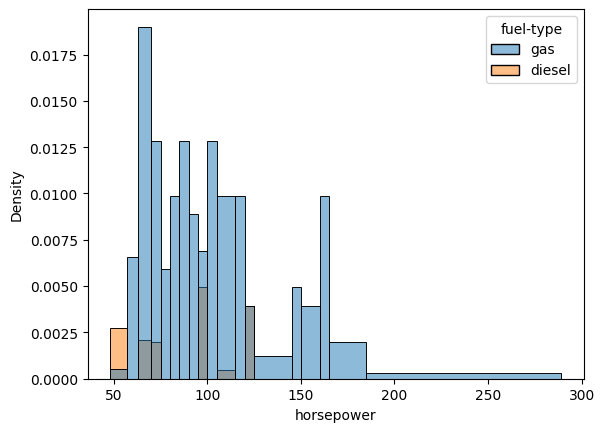

In [13]:
sns.histplot(x = horsepower, hue = fuel_type, bins = bins, stat = 'density')
plt.show()

Conclusion: the distribution with 'gas' is wider, 'diesel' is mainly concentrated to the left of the plot

Plotting two boxplots of horsepower given different fuel types

Purpose: see how horsepower is distributed with different types of fuel

Condition: use seaborn command `boxplot`

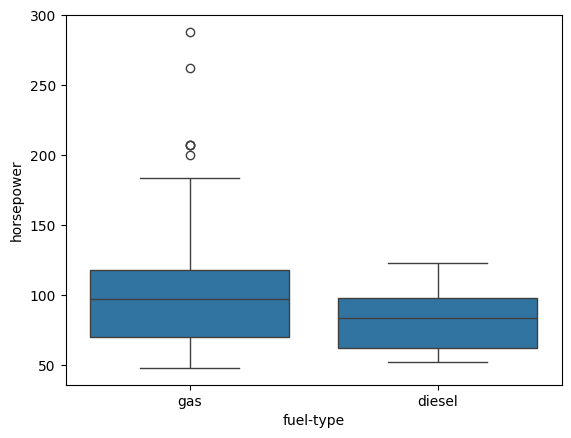

In [14]:
sns.boxplot(x = fuel_type, y = horsepower, orient = 'v')
plt.show()

Conclusion: there are outliers for 'gas', and no outliers for 'diesel'. The mean for 'gas' is higher, and the distribution is wider

Variance decomposition

Calculating total variance, variances and means, counts between groups, finding correlation ratio for 'diesel' 

Purpose: see differences between the two formed groups

Condition: use numpy command `var`, grouping with pandas command `groupby`, also `to_numeric` for 'horsepower' column (its values are str type) and `mean`, `var(ddof=0)`, `count` and `value_count` to reach the desired results

In [15]:
power_var = np.var(horsepower)
power_var

np.float64(1569.4614768618505)

In [16]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df1 = df[['horsepower', 'fuel-type']]
mi = df1.groupby('fuel-type').mean() 
mi

,horsepower
fuel-type,
diesel,84.450000
gas,106.420765


Conclusion: mean for 'gas' is higher

In [17]:
si2 = df1.groupby('fuel-type').var(ddof = 0) 
si2

,horsepower
fuel-type,
diesel,640.147500
gas,1623.467766


Conclusion: variance for 'gas' is higher

In [18]:
df['fuel-type'].value_counts()

fuel-type
gas       183
diesel     20
Name: count, dtype: int64

In [19]:
ni = df.groupby('fuel-type').count() 
ni

,make,horsepower,city-mpg
fuel-type,,,
diesel,20,20,20
gas,183,183,183


Conclusion: more units with 'gas' than with 'diesel'

In [20]:
N = len(df)
intra_class = 1 / N * (ni * si2)

inter_class = [df.horsepower[df['fuel-type'] == 'gas'].var(ddof=0), df.horsepower[df['fuel-type'] == 'diesel'].var(ddof=0)]

intra_class, inter_class

(           city-mpg   horsepower  make
 fuel-type                             
 diesel          NaN    63.068719   NaN
 gas             NaN  1463.520202   NaN,
 [np.float64(1623.467765534952), np.float64(640.1475000000002)])

In [21]:
intra_given_diesel = intra_class['horsepower']['diesel']
inter_given_diesel = inter_class[1]
correlation_ratio = intra_given_diesel / inter_given_diesel
correlation_ratio

np.float64(0.09852216748768473)

Conclusion: a weak or no relationship between the two variables

1.3 Contingency tables and chi-square test of independence

Creating contingency tables for categorical variables

Purpose: use the table to analyze dependence between the variables

Condition: use pandas command `crosstab`, create different tabs and decide, which one is appropriate contingency table

In [22]:
c_t = pd.crosstab(index = df['make'], columns = df['fuel-type'], margins = True, margins_name = 'Total')
c_t

fuel-type,diesel,gas,Total
make,,,
alfa-romero,0,3,3
audi,0,7,7
bmw,0,8,8
chevrolet,0,3,3
dodge,0,9,9
honda,0,13,13
isuzu,0,4,4
jaguar,0,3,3
mazda,2,15,17


In [23]:
pd.crosstab(index = df['make'], columns = df['fuel-type'], margins = True, margins_name = 'Total', normalize = True)

fuel-type,diesel,gas,Total
make,,,
alfa-romero,0.000000,0.014778,0.014778
audi,0.000000,0.034483,0.034483
bmw,0.000000,0.039409,0.039409
chevrolet,0.000000,0.014778,0.014778
dodge,0.000000,0.044335,0.044335
honda,0.000000,0.064039,0.064039
isuzu,0.000000,0.019704,0.019704
jaguar,0.000000,0.014778,0.014778
mazda,0.009852,0.073892,0.083744


In [24]:
pd.crosstab(index = df['make'], columns = df['fuel-type'], margins = True, margins_name = 'Total', normalize = 'index')

fuel-type,diesel,gas
make,,
alfa-romero,0.000000,1.000000
audi,0.000000,1.000000
bmw,0.000000,1.000000
chevrolet,0.000000,1.000000
dodge,0.000000,1.000000
honda,0.000000,1.000000
isuzu,0.000000,1.000000
jaguar,0.000000,1.000000
mazda,0.117647,0.882353


In [25]:
pd.crosstab(index = df['make'], columns = df['fuel-type'], margins = True, margins_name = 'Total', normalize = 'columns')

fuel-type,diesel,gas,Total
make,,,
alfa-romero,0.00,0.016393,0.014778
audi,0.00,0.038251,0.034483
bmw,0.00,0.043716,0.039409
chevrolet,0.00,0.016393,0.014778
dodge,0.00,0.049180,0.044335
honda,0.00,0.071038,0.064039
isuzu,0.00,0.021858,0.019704
jaguar,0.00,0.016393,0.014778
mazda,0.10,0.081967,0.083744


Conclusion: the first one is an appropriate contingency table, and the last command allows to compare the distribution of makes given car's fuel type

Do chi2 tests on independence of variables

Purpose: see if variables are independent from each other

Condition: use scipy.stats command `chi2_contingency`

In [26]:
st.chi2_contingency(c_t)

Chi2ContingencyResult(statistic=np.float64(48.39947532115595), pvalue=np.float64(0.23038731036969884), dof=42, expected_freq=array([[2.95566502e-01, 2.70443350e+00, 3.00000000e+00],
       [6.89655172e-01, 6.31034483e+00, 7.00000000e+00],
       [7.88177340e-01, 7.21182266e+00, 8.00000000e+00],
       [2.95566502e-01, 2.70443350e+00, 3.00000000e+00],
       [8.86699507e-01, 8.11330049e+00, 9.00000000e+00],
       [1.28078818e+00, 1.17192118e+01, 1.30000000e+01],
       [3.94088670e-01, 3.60591133e+00, 4.00000000e+00],
       [2.95566502e-01, 2.70443350e+00, 3.00000000e+00],
       [1.67487685e+00, 1.53251232e+01, 1.70000000e+01],
       [7.88177340e-01, 7.21182266e+00, 8.00000000e+00],
       [9.85221675e-02, 9.01477833e-01, 1.00000000e+00],
       [1.28078818e+00, 1.17192118e+01, 1.30000000e+01],
       [1.77339901e+00, 1.62266010e+01, 1.80000000e+01],
       [1.08374384e+00, 9.91625616e+00, 1.10000000e+01],
       [6.89655172e-01, 6.31034483e+00, 7.00000000e+00],
       [4.92610837e-

In [27]:
tab = pd.crosstab(index = df['make'], columns = df['fuel-type'])
tab

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


In [28]:
res = st.chi2_contingency(tab, correction = False)
res

Chi2ContingencyResult(statistic=np.float64(48.399475321155954), pvalue=np.float64(0.00037379541050789244), dof=20, expected_freq=array([[ 0.2955665 ,  2.7044335 ],
       [ 0.68965517,  6.31034483],
       [ 0.78817734,  7.21182266],
       [ 0.2955665 ,  2.7044335 ],
       [ 0.88669951,  8.11330049],
       [ 1.28078818, 11.71921182],
       [ 0.39408867,  3.60591133],
       [ 0.2955665 ,  2.7044335 ],
       [ 1.67487685, 15.32512315],
       [ 0.78817734,  7.21182266],
       [ 0.09852217,  0.90147783],
       [ 1.28078818, 11.71921182],
       [ 1.77339901, 16.22660099],
       [ 1.08374384,  9.91625616],
       [ 0.68965517,  6.31034483],
       [ 0.49261084,  4.50738916],
       [ 0.591133  ,  5.408867  ],
       [ 1.18226601, 10.81773399],
       [ 3.15270936, 28.84729064],
       [ 1.18226601, 10.81773399],
       [ 1.08374384,  9.91625616]]))

Decision: since 𝑝<0.05, we reject the null hypothesis. This implies that there is evidence of an association between the two categorical variables being tested